# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнила студентка гр. 9382 Пя Сон Хва, вариант 14.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Задача Коши - задача отысканияч решения дифференциального уравнения, удовлетворяющего заданному начальному условию.

Метод половинного деления основан на последовательном делении отрезка локализации корня пополам.

Для этого выбирается начальное приближение к отрезку $[a,b]$, такое, что $f(a)*f(b) < 0$, затем определяется знак функции в точке $c = (a+b)/2$ - середине отрезка $[a,b]$.  Если он противоположен  знаку функции в точке $a$, то корень локализован на отрезке $[a,c]$, если же нет – то на отрезке $[c,b]$.

## Постановка задачи

Рассматривается следующая краевая задача. 

Дано уравнение: $y''=f(x,y),a<x<b$ (1)

и граничные условия $y(a)= y_a,y(b)= y_b$ (2)

Требуется найти решение задачи (1)-(2) и построить его график. 
Рассмотрим задачу Коши для уравнения (1) с начальными условиями $$y(a)= y_a,y'(a)=h (3)$$
План решения основан на многократном решении задачи Коши (1), (3).  Значение решения задачи Коши при $x=b$ является функцией  от $h$.

Задача сводится к отысканию такого значения переменной $h$, при котором выполнено условие на правом конце отрезка, т.е.  должно выполняться $$y(b,h)= y_b, (4)$$
Это уравнение с одним неизвестным $h$.  

Для решения уравнения (4) можно применить обычный метод половинного деления.

## Выполнение работы

$$a= 0, b = 2$$
$$f(x,y)= 2^x/(x+y)$$
$$y_a = 1, y_b = 2$$

По условию $y'' = 2^x/(x+y)$ при $0 < x < 2$ $$y(0) = y_0 = 1, y(2) = y_2 = 2$$
Рассмотрим задачу Коши для нашего уравнения с начальными условиями $$ y(0) = 1, y'(0) = h$$
Ищем зависимость между $y'$ и $y$ в виде $y'= p(y)$, где $p(y)$ - неизвестная функция.
Тогда исходная задача примет вид
$$p' = 2^x/(x+y)$$
Берем наугад числа $h_0 = 2, delta\_h = 4$ и решим численно дифферециальное уравнение.

-0.513671875


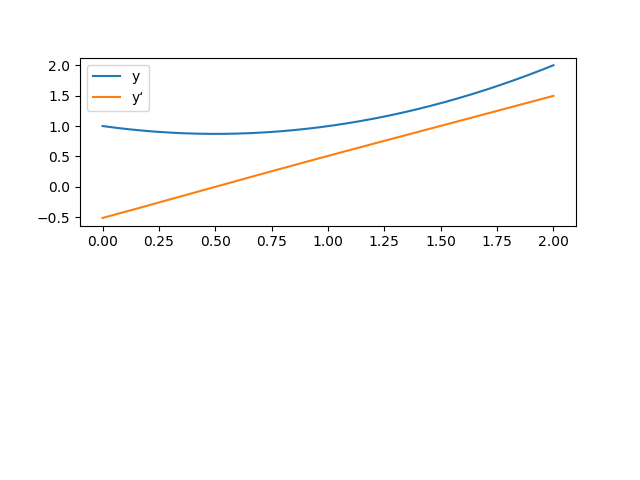

In [35]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_bvp, solve_ivp
import numpy as np

a, b = 0, 2
y_a, y_b = 1, 2
h =  2 #y'(0)
eps = 0.001
delta_h = 4

def fvdp1(x,y):
    dy1 = y [1] #производная первого порядка
    dy2 = 2**x / (x + y[0])
    return [dy1,dy2]
 
def solve_second_order_ode(h): #y(0), y'(0)
    global a, b, y_a
    t2 = np.linspace(a, b, 1000)
    y = odeint(fvdp1, [y_a, h], t2, tfirst=True)
    return y
    
def calc_Koshi():
    global delta_h, eps, h, y_a, y_b
    y = solve_second_order_ode(h)[-1][0]
    while abs(y - y_b) > eps:
        #print('h = ', h, 'y = ', y,'delta_h = ', delta_h);
            
        h_a = h - delta_h
        h_b = h + delta_h
        
        y_tmp_a = solve_second_order_ode(h_a)[-1][0]
        y_tmp_b = solve_second_order_ode(h_b)[-1][0]
        
        if (y_tmp_a - y_b)*(y - y_b) < 0:
            h = h_a + delta_h/2
        elif (y_tmp_b - y_b)*(y - y_b) < 0:
            h = h_b - delta_h/2
        else:
            print("Task has no solution!")
            break
            
        delta_h /= 2
        
        y = solve_second_order_ode(h)[-1][0]
        
    #print('h = ', h, 'y = ', y,'delta_h = ', delta_h);  
    return h
    
def show_Koshi():
    global y_a, a, b
    y = solve_second_order_ode(h)
    t2 = np.linspace(a,b,1000)
    plt.subplot(211)
    y1, = plt.plot(t2,y[:,0],label='y')
    y1_1, = plt.plot(t2,y[:,1],label='y‘')             
    plt.legend(handles=[y1,y1_1])
    plt.show()
    
print(calc_Koshi())
show_Koshi()

| h            | y                  | delta_h     |
|--------------|--------------------|-------------|
| 2            | 6.1606851832843015 | 4           |
| 0            | 2.7476235668096587 | 2           |
| -1           | 1.4000913557466004 | 1           |
| -0.5         | 2.019545939451294  | 0.5         |
| -0.75        | 1.6928337753725076 | 0.25        |
| -0.625       | 1.8524433013764428 | 0.125       |
| -0.5625      | 1.9351132495682322 | 0.0625      |
| -0.53125     | 1.9771157715007948 | 0.03125     |
| -0.515625    | 1.9982781806955547 | 0.015625    |
| -0.5078125   | 2.0088989836574105 | 0.0078125   |
| -0.51171875  | 2.003585297234853  | 0.00390625  |
| -0.513671875 | 2.000930922380172  | 0.001953125 |

Получилось $h = -0.513671875, y = 2.000930922380172$

## Выводы

Задача свелась к отысканию такого значения $h$, при котором выполнялось наше правое краевое условие: $y(b, h) = y_b$.

Вычесленное значение и $y_b$ приблизительно совпали.